In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [3]:
start=datetime.datetime(2019,1,1)
end=datetime.datetime(2021,6,19)


In [ ]:
#NIFTY 50

In [ ]:
nifty = data.DataReader("NSE", 'yahoo', start, end)

In [4]:
n50=pd.DataFrame(nifty)
n50

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,14.90,14.10,14.55,14.55,7400.0,14.55
2019-01-02,15.00,14.50,14.55,14.55,1700.0,14.55
2019-01-03,15.00,14.50,14.95,14.95,8900.0,14.95
2019-01-04,14.90,14.00,14.65,14.65,56500.0,14.65
2019-01-07,14.00,14.00,14.00,14.00,3800.0,14.00
...,...,...,...,...,...,...
2021-06-14,8.74,8.30,8.60,8.60,3600.0,8.60
2021-06-15,8.60,8.30,8.32,8.32,183000.0,8.32
2021-06-16,8.60,8.30,8.32,8.32,183000.0,8.32


In [5]:
n50.describe()

,High,Low,Open,Close,Volume,Adj Close
count,619.000000,619.000000,619.000000,619.000000,6.190000e+02,619.000000
mean,10.448950,10.130097,10.260016,10.260016,6.096220e+04,10.260016
std,2.369074,2.389816,2.374287,2.374287,2.851962e+05,2.374287
min,6.580000,6.500000,6.580000,6.580000,0.000000e+00,6.580000
25%,8.500000,8.170000,8.280000,8.280000,2.600000e+03,8.280000
50%,9.800000,9.200000,9.500000,9.500000,8.800000e+03,9.500000
75%,12.400000,12.000000,12.075000,12.075000,2.445000e+04,12.075000
max,16.000000,15.450000,15.450000,15.450000,4.438300e+06,15.450000


<AxesSubplot:xlabel='High', ylabel='Count'>

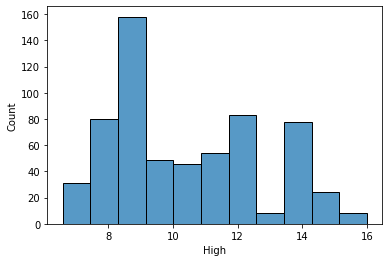

In [6]:
sns.histplot(n50['High'])

In [7]:
n50.drop('Volume',axis=1,inplace=True)
n50.drop('Adj Close',axis=1,inplace=True)
n50

,High,Low,Open,Close
Date,,,,
2018-12-31,14.90,14.10,14.55,14.55
2019-01-02,15.00,14.50,14.55,14.55
2019-01-03,15.00,14.50,14.95,14.95
2019-01-04,14.90,14.00,14.65,14.65
2019-01-07,14.00,14.00,14.00,14.00
...,...,...,...,...
2021-06-14,8.74,8.30,8.60,8.60
2021-06-15,8.60,8.30,8.32,8.32
2021-06-16,8.60,8.30,8.32,8.32


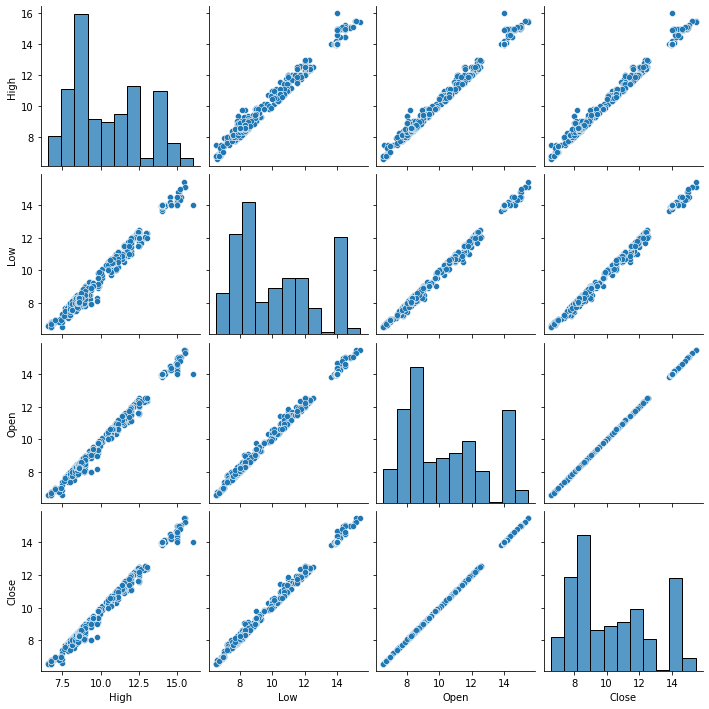

In [8]:
sns.pairplot(n50)

In [ ]:
#TRAINING AND TESTING

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X=n50[['Low','Open','Close']].values

In [11]:
y=n50['High'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
print(X_train.shape)
print(X_test.shape)

(433, 3)
(186, 3)


In [ ]:
#SCALING

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler=MinMaxScaler()

In [34]:
scaler.fit(X_train)

MinMaxScaler()

In [35]:
X_train=scaler.transform(X_train)

In [36]:
X_test=scaler.transform(X_test)

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

In [38]:
model=Sequential()
model.add(Dense(3,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse')

In [39]:
model.fit(X_train,y_train,epochs=400,validation_data=(X_test,y_test))

Epoch 1/400
14/14 [==============================] - 0s 18ms/step - loss: 111.4309 - val_loss: 119.5768
Epoch 2/400
14/14 [==============================] - 0s 3ms/step - loss: 110.3050 - val_loss: 118.5103
Epoch 3/400
14/14 [==============================] - 0s 3ms/step - loss: 109.3302 - val_loss: 117.4647
Epoch 4/400
14/14 [==============================] - 0s 3ms/step - loss: 108.3477 - val_loss: 116.3959
Epoch 5/400
14/14 [==============================] - 0s 3ms/step - loss: 107.3429 - val_loss: 115.2905
Epoch 6/400
14/14 [==============================] - 0s 3ms/step - loss: 106.3047 - val_loss: 114.1659
Epoch 7/400
14/14 [==============================] - 0s 3ms/step - loss: 105.2393 - val_loss: 113.0115
Epoch 8/400
14/14 [==============================] - 0s 3ms/step - loss: 104.1262 - val_loss: 111.7681
Epoch 9/400
14/14 [==============================] - 0s 3ms/step - loss: 102.9465 - val_loss: 110.4767
Epoch 10/400
14/14 [==============================] - 0s 3ms/step - loss

14/14 [==============================] - 0s 3ms/step - loss: 0.0612 - val_loss: 0.0742
Epoch 163/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0614 - val_loss: 0.0725
Epoch 164/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0621 - val_loss: 0.0697
Epoch 165/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0616 - val_loss: 0.0696
Epoch 166/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0616 - val_loss: 0.0703
Epoch 167/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0612 - val_loss: 0.0702
Epoch 168/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0612 - val_loss: 0.0694
Epoch 169/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0605 - val_loss: 0.0695
Epoch 170/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0611 - val_loss: 0.0708
Epoch 171/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0615 - val_loss: 0.0696
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0592 - val_loss: 0.0690
Epoch 325/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0601 - val_loss: 0.0688
Epoch 326/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0600 - val_loss: 0.0696
Epoch 327/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0607 - val_loss: 0.0701
Epoch 328/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0602 - val_loss: 0.0690
Epoch 329/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0596 - val_loss: 0.0703
Epoch 330/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0606 - val_loss: 0.0682
Epoch 331/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0598 - val_loss: 0.0681
Epoch 332/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0600 - val_loss: 0.0719
Epoch 333/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0612 - val_loss: 0.0681
Epoc

In [40]:
model.history.history

{'loss': [111.43087005615234,
  110.30497741699219,
  109.33021545410156,
  108.34769439697266,
  107.34288024902344,
  106.30470275878906,
  105.23933410644531,
  104.12623596191406,
  102.94650268554688,
  101.71674346923828,
  100.43047332763672,
  99.09579467773438,
  97.68679809570312,
  96.22086334228516,
  94.70630645751953,
  93.1195297241211,
  91.46365356445312,
  89.7595443725586,
  87.99993133544922,
  86.18478393554688,
  84.29578399658203,
  82.36067199707031,
  80.37289428710938,
  78.3119125366211,
  76.20338439941406,
  74.03524017333984,
  71.81043243408203,
  69.53104400634766,
  67.20037841796875,
  64.81549072265625,
  62.38494110107422,
  59.915279388427734,
  57.38983154296875,
  54.812950134277344,
  52.24928283691406,
  49.633277893066406,
  47.00797653198242,
  44.36231231689453,
  41.68760299682617,
  39.00086212158203,
  36.322975158691406,
  33.6641960144043,
  31.005416870117188,
  28.394542694091797,
  25.808067321777344,
  23.26082992553711,
  20.8291244

<AxesSubplot:>

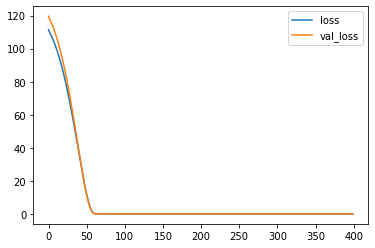

In [42]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [43]:
model.metrics_names

['loss']

In [44]:
training_score=model.evaluate(X_train,y_train,verbose=0)
test_score=model.evaluate(X_test,y_test,verbose=0)

In [45]:
training_score

0.05883486941456795

In [46]:
test_score

0.06783979386091232

In [47]:
predictions=model.predict(X_test)
predictions

array([[14.195731 ],
       [ 8.599799 ],
       [14.195731 ],
       [ 9.422911 ],
       [14.195731 ],
       [ 9.490715 ],
       [11.7143955],
       [ 8.236198 ],
       [ 9.436472 ],
       [ 8.804597 ],
       [11.457894 ],
       [ 8.335451 ],
       [12.210662 ],
       [12.294192 ],
       [14.997117 ],
       [12.395898 ],
       [ 8.975981 ],
       [ 8.4366665],
       [10.395104 ],
       [ 6.95023  ],
       [ 7.9970083],
       [14.195731 ],
       [11.572873 ],
       [14.195731 ],
       [12.409169 ],
       [ 8.637539 ],
       [11.572873 ],
       [ 7.9238944],
       [ 8.335451 ],
       [ 8.736793 ],
       [14.691998 ],
       [11.7143955],
       [ 7.818929 ],
       [14.195731 ],
       [12.443072 ],
       [ 7.043194 ],
       [11.204857 ],
       [ 9.188048 ],
       [12.55805  ],
       [12.4769745],
       [ 8.646773 ],
       [ 8.362573 ],
       [14.195731 ],
       [ 9.23306  ],
       [ 9.491119 ],
       [14.195731 ],
       [12.113862 ],
       [ 8.24

In [48]:
pred_n50=pd.DataFrame(y_test,columns=['Test Y'])

In [49]:
pred_n50

,Test Y
0,14.95
1,8.50
2,14.00
3,9.80
4,14.00
...,...
181,10.50
182,7.80
183,14.00
184,8.52


In [50]:
test_predictions=pd.Series(predictions.reshape(186,))

In [51]:
test_predictions

0      14.195731
1       8.599799
2      14.195731
3       9.422911
4      14.195731
         ...    
181    10.462909
182     7.997008
183    14.195731
184     8.736793
185    12.309916
Length: 186, dtype: float32

In [52]:
pred_df=pd.concat([pred_n50,test_predictions],axis=1)
pred_df

,Test Y,0
0,14.95,14.195731
1,8.50,8.599799
2,14.00,14.195731
3,9.80,9.422911
4,14.00,14.195731
...,...,...
181,10.50,10.462909
182,7.80,7.997008
183,14.00,14.195731
184,8.52,8.736793


In [53]:
pred_df.columns=['Test_y','Model_predictions']
pred_df

,Test_y,Model_predictions
0,14.95,14.195731
1,8.50,8.599799
2,14.00,14.195731
3,9.80,9.422911
4,14.00,14.195731
...,...,...
181,10.50,10.462909
182,7.80,7.997008
183,14.00,14.195731
184,8.52,8.736793


<AxesSubplot:xlabel='Test_y', ylabel='Model_predictions'>

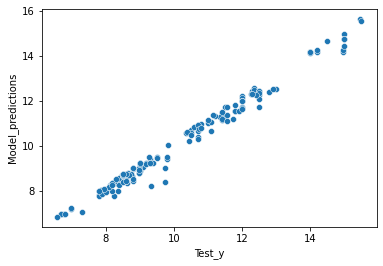

In [54]:
sns.scatterplot(x='Test_y',y='Model_predictions',data=pred_df)

In [55]:
pred_df['Error']=pred_df['Test_y']-pred_df['Model_predictions']
pred_df['Error']

0      0.754269
1     -0.099799
2     -0.195731
3      0.377090
4     -0.195731
         ...   
181    0.037091
182   -0.197008
183   -0.195731
184   -0.216792
185   -0.009915
Name: Error, Length: 186, dtype: float64

C:\Users\acer\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Error', ylabel='Density'>

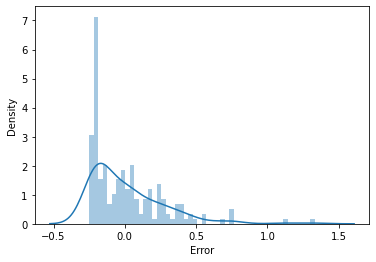

In [56]:
sns.distplot(pred_df['Error'],bins=50)

In [57]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [58]:
mean_absolute_error(pred_df['Test_y'],pred_df['Model_predictions'])

0.19459861324679467

In [59]:
mean_squared_error(pred_df['Test_y'],pred_df['Model_predictions'])

0.06783979141864767

In [77]:
TCS= data.DataReader("TCS", 'yahoo', start, end)
TCS

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,4.86,4.63,4.71,4.77,456500.0,4.458913
2019-01-02,5.08,4.69,4.72,4.95,272500.0,4.627174
2019-01-03,5.08,4.82,4.92,4.93,256800.0,4.608478
2019-01-04,5.15,4.95,5.01,5.12,217600.0,4.786087
2019-01-07,5.49,5.05,5.12,5.38,246100.0,5.029130
...,...,...,...,...,...,...
2021-06-14,14.00,13.44,13.84,13.49,443000.0,13.490000
2021-06-15,13.44,12.91,13.41,13.05,377200.0,13.050000
2021-06-16,12.97,12.46,12.90,12.92,441400.0,12.920000


In [78]:
TCS.drop('Volume',axis=1,inplace=True)
TCS.drop('Adj Close',axis=1,inplace=True)


In [81]:
TCS.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
High,622.0,7.476704,4.318141,2.05,4.1900,6.490,9.8375,19.309999
Low,622.0,6.998344,4.022596,1.80,3.9825,6.020,9.0625,17.780001
Open,622.0,7.233650,4.174954,1.80,4.1000,6.225,9.4775,19.150000
Close,622.0,7.231350,4.164136,1.99,4.1000,6.195,9.4900,19.190001


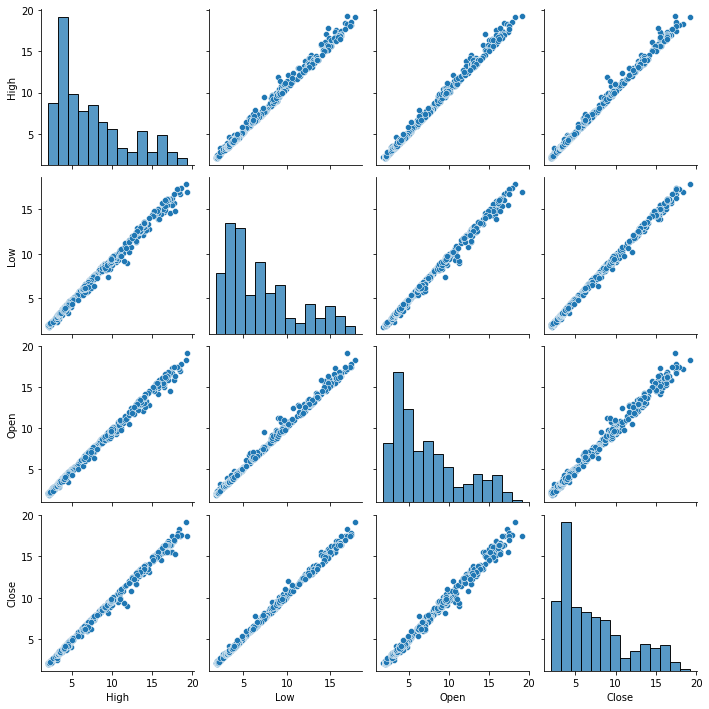

In [82]:
sns.pairplot(TCS)

In [83]:
from sklearn.model_selection import train_test_split

In [86]:
X=TCS.drop('Low',axis=1).values
y=TCS['Low'].values
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.3, random_state=101)

In [89]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(435, 3)
(187, 3)
(435,)
(187,)


In [108]:
from sklearn.preprocessing import MinMaxScaler

In [109]:
scaler2=MinMaxScaler()

In [110]:
scaler2.fit(X_train)

MinMaxScaler()

In [111]:
X_train=scaler2.transform(X_train)
X_test=scaler2.transform(X_test)

In [112]:
#creating model2
model2=Sequential()
model2.add(Dense(3,activation='relu'))
model2.add(Dense(3,activation='relu'))
model2.add(Dense(3,activation='relu'))
model2.add(Dense(1))
model2.compile(optimizer='rmsprop',loss='mse')

In [113]:
from tensorflow.keras.callbacks import EarlyStopping

In [114]:
earlystop=EarlyStopping(monitor='val_loss',mode='min',patience=25,verbose=1)

In [115]:
model2.fit(X_train,y_train,epochs=800,validation_data=(X_test,y_test),verbose=1,callbacks=[earlystop])

Epoch 1/800
14/14 [==============================] - 0s 18ms/step - loss: 65.5533 - val_loss: 62.7555
Epoch 2/800
14/14 [==============================] - 0s 3ms/step - loss: 65.0149 - val_loss: 62.2557
Epoch 3/800
14/14 [==============================] - 0s 4ms/step - loss: 64.4925 - val_loss: 61.7291
Epoch 4/800
14/14 [==============================] - 0s 3ms/step - loss: 63.9369 - val_loss: 61.1565
Epoch 5/800
14/14 [==============================] - 0s 3ms/step - loss: 63.3253 - val_loss: 60.5321
Epoch 6/800
14/14 [==============================] - 0s 3ms/step - loss: 62.6670 - val_loss: 59.8676
Epoch 7/800
14/14 [==============================] - 0s 3ms/step - loss: 61.9669 - val_loss: 59.1549
Epoch 8/800
14/14 [==============================] - 0s 3ms/step - loss: 61.2132 - val_loss: 58.3957
Epoch 9/800
14/14 [==============================] - 0s 3ms/step - loss: 60.4114 - val_loss: 57.5890
Epoch 10/800
14/14 [==============================] - 0s 3ms/step - loss: 59.5678 - val_lo

14/14 [==============================] - 0s 3ms/step - loss: 0.0436 - val_loss: 0.0385
Epoch 164/800
14/14 [==============================] - 0s 3ms/step - loss: 0.0431 - val_loss: 0.0391
Epoch 165/800
14/14 [==============================] - 0s 3ms/step - loss: 0.0430 - val_loss: 0.0378
Epoch 166/800
14/14 [==============================] - 0s 3ms/step - loss: 0.0427 - val_loss: 0.0380
Epoch 167/800
14/14 [==============================] - 0s 3ms/step - loss: 0.0434 - val_loss: 0.0389
Epoch 168/800
14/14 [==============================] - 0s 3ms/step - loss: 0.0434 - val_loss: 0.0377
Epoch 169/800
14/14 [==============================] - 0s 3ms/step - loss: 0.0427 - val_loss: 0.0376
Epoch 170/800
14/14 [==============================] - 0s 3ms/step - loss: 0.0435 - val_loss: 0.0379
Epoch 171/800
14/14 [==============================] - 0s 4ms/step - loss: 0.0423 - val_loss: 0.0386
Epoch 172/800
14/14 [==============================] - 0s 4ms/step - loss: 0.0430 - val_loss: 0.0376
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0419 - val_loss: 0.0373
Epoch 245/800
14/14 [==============================] - 0s 3ms/step - loss: 0.0420 - val_loss: 0.0382
Epoch 246/800
14/14 [==============================] - 0s 3ms/step - loss: 0.0428 - val_loss: 0.0369
Epoch 247/800
14/14 [==============================] - 0s 3ms/step - loss: 0.0425 - val_loss: 0.0368
Epoch 248/800
14/14 [==============================] - 0s 3ms/step - loss: 0.0416 - val_loss: 0.0407
Epoch 249/800
14/14 [==============================] - 0s 4ms/step - loss: 0.0419 - val_loss: 0.0413
Epoch 250/800
14/14 [==============================] - 0s 4ms/step - loss: 0.0428 - val_loss: 0.0369
Epoch 251/800
14/14 [==============================] - 0s 4ms/step - loss: 0.0415 - val_loss: 0.0369
Epoch 252/800
14/14 [==============================] - 0s 4ms/step - loss: 0.0426 - val_loss: 0.0373
Epoch 253/800
14/14 [==============================] - 0s 3ms/step - loss: 0.0422 - val_loss: 0.0371
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0413 - val_loss: 0.0351
Epoch 407/800
14/14 [==============================] - 0s 4ms/step - loss: 0.0406 - val_loss: 0.0350
Epoch 408/800
14/14 [==============================] - 0s 4ms/step - loss: 0.0409 - val_loss: 0.0360
Epoch 409/800
14/14 [==============================] - 0s 4ms/step - loss: 0.0417 - val_loss: 0.0356
Epoch 410/800
14/14 [==============================] - 0s 3ms/step - loss: 0.0408 - val_loss: 0.0351
Epoch 411/800
14/14 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0353
Epoch 412/800
14/14 [==============================] - 0s 3ms/step - loss: 0.0413 - val_loss: 0.0352
Epoch 413/800
14/14 [==============================] - 0s 4ms/step - loss: 0.0418 - val_loss: 0.0358
Epoch 414/800
14/14 [==============================] - 0s 4ms/step - loss: 0.0402 - val_loss: 0.0350
Epoch 415/800
14/14 [==============================] - 0s 4ms/step - loss: 0.0405 - val_loss: 0.0386
Epoc

<AxesSubplot:>

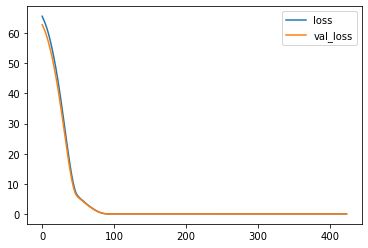

In [118]:
model2_loss=pd.DataFrame(model2.history.history)
model2_loss.plot()

In [126]:
test2_pred=model2.predict(X_test)
test2_pred_df=pd.DataFrame(test2_pred,columns=['pred'])
test2_pred_df

,pred
0,9.096648
1,4.436124
2,9.256653
3,9.709861
4,3.587054
...,...
182,4.129356
183,8.548272
184,7.979127
185,3.629350


In [128]:
y_df=pd.DataFrame(y_test,columns=['Y_test'])

In [131]:
predictions2=pd.concat([test2_pred_df,y_df],axis=1)
predictions2

,pred,Y_test
0,9.096648,9.03
1,4.436124,4.39
2,9.256653,9.32
3,9.709861,9.81
4,3.587054,3.09
...,...,...
182,4.129356,4.05
183,8.548272,8.73
184,7.979127,7.96
185,3.629350,3.60


<AxesSubplot:>

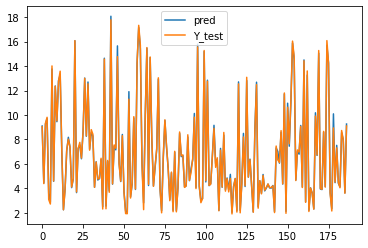

In [135]:

predictions2.plot()

<AxesSubplot:xlabel='Y_test', ylabel='pred'>

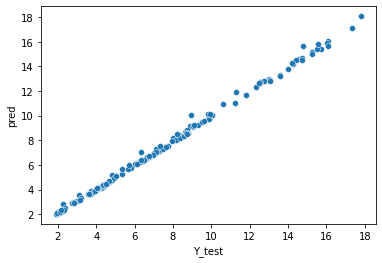

In [137]:
sns.scatterplot(x='Y_test',y='pred',data=predictions2)

In [142]:
predictions2['Error']=predictions2['Y_test']-predictions2['pred']


C:\Users\acer\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Error', ylabel='Density'>

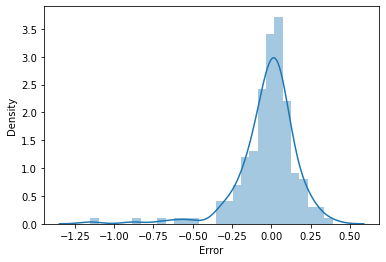

In [148]:
error2=sns.distplot(predictions2['Error'])
error2

In [146]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions2['Y_test'],predictions2['pred'])

0.11937623737967588